# ASSIGNMENT - 2

### Name         :  Nazrin Thanikattil Rafeeque
### Student ID :  21031314


In [1]:
import pandas as pd
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import seaborn as sns

### Defining Functions

In [2]:
"""Defines a function which takes a filename as argument, reads a dataframe in World bank format and returns 
two dataframes: one with years as columns and one with countries as columns"""

def wb_dataframe(Filename,country_list):
    df1 = wb.data.DataFrame(Filename,country_codes,time=range(2010,2019),columns='economy')
    df2= wb.data.DataFrame(Filename,country_codes,time=range(2010,2019))
    
    return df1,df2


In [3]:
"""Defines a function to provide Xlabel ,Y label and Titler for the Plots"""
def plot_labels(x_label,y_label,title):
    plt.xticks( rotation='vertical')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title,fontsize= 15, fontweight='bold')

In [4]:
"""Function to print the Different summary statitics of dataframe Attributes"""
def Display_stats(Attributes):
    print("average:        ", np.average(Attributes))
    print("std. deviations:", np.std(Attributes))
    print("maximum :       ", np.max(Attributes))
    print("minimum :       ", np.min(Attributes))
    print("skewness:       ", stats.skew(Attributes))
    print("kurtosis:       ", stats.kurtosis(Attributes))

    return

In [5]:
"""Defining Function for the Subplots"""


def subplot(data_1,data_2,data_3,data_4):  
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(15,8), constrained_layout=True)
   
    plt.subplot(4,1,1)
    plt.plot(data_1) 
    plot_labels('Years','values','Agricultural land (% of land area)')
   
    
    plt.subplot(4,1,2)
    plt.plot(data_2)
    plot_labels('Years','values','Forest Area')

    plt.subplot(4,1,3)
    plt.plot(data_3)
    plot_labels('Years','values','% of total territorial area')

    plt.subplot(4,1,4)
    plt.plot(data_4)
    plot_labels('Years','values','value added (% of GDP)')
    
    


In [6]:
"""Function defining the Pie Plots Dimensions"""

def Region_wise(df1,df2,subtitle):
    fig, axes = plt.subplots(1, 2, figsize=(3,2),dpi=144)
    plt.suptitle(subtitle,size=10)
    for ax, df in zip(axes, (df1,df2)):
        ax.pie(df, labels=df.index,shadow=False,startangle=90, autopct="%1.1f%%"
                    ,textprops={'fontsize': 5})
   

In [7]:
"""Prints Pearon's and Spearmans correction coefficients between the different attributes of the dataframe"""

def print_corr(df):
    print("Pearson's correlation coefficients")
    r, p = stats.spearmanr(df["Agricultural land (% of land area)"], df["Forest Area"])
    print("\n Agricultural land (% of land area) vs. Forest Area coefficient ", r, "probability", p)
    r, p = stats.spearmanr(df["Forest Area"], df["% of total territorial area"])
    print("\n Forest Area vs. % of total territorial area coefficient", r, "probability", p)
    r, p = stats.spearmanr(df["% of total territorial area"], df["value added (% of GDP)"])
    print("\n % of total territorial area vs. value added (% of GDP) coefficient", r, "probability", p)
    r, p = stats.spearmanr(df["Agricultural land (% of land area)"], df["value added (% of GDP)"])
    print("\n Agricultural land (% of land area) vs. value added (% of GDP) coefficient", r, "probability", p)

Defining and Creating DataFrame

In [8]:
#List containing the country list,indicators from World Bank API and Country groups are assigned

country_codes  =  ['GBR','NLD','ESP','JPN','KOR','IND','LKA','USA','CAN']
indicator_list =  [' AG.LND.AGRI.ZS','AG.LND.ARBL.ZS','AG.LND.FRST.ZS','NV.AGR.TOTL.ZS','ER.PTD.TOTL.ZS']
country_groups =  ({'GBR':'Europe','NLD':'Europe',
                 'ESP':'Europe','JPN':'East Asia','KOR':'East Asia',
                 'IND':'South Asia','LKA':'South Asia',
                 'USA':'North America','CAN':'North America'})

In [9]:
idx=pd.IndexSlice
#Defining Multiindex for Dataframe 2
df1,df2 = wb_dataframe(indicator_list,country_codes)

df2
index1_ = pd.MultiIndex.from_product([['Agricultural land (% of land area)','Forest Area','value added (% of GDP)'
                                       ,'% of total territorial area'],['GBR','NLD','ESP','JPN','KOR','IND','LKA','USA','CAN']]
                                       ,names=['Attributes','Country'])
df2.index = index1_

In [10]:
#Defining Multiindex for Dataframe 1

index_ = pd.MultiIndex.from_product([['Agricultural land (% of land area)','Forest Area',
       'value added (% of GDP)','% of total territorial area'],['YR2010','YR2011','YR2012','YR2013','YR2014','YR2015',
                                                                'YR2016','YR2017','YR2018']],names=['Attributes','year'])
df1.index=index_


### Data Cleaning

In [11]:
# Checks for the null values in both the dataframes
print(df1.isna().sum())
print(df1.info())

print(df2.isna().sum())
print(df2.info())

CAN    6
ESP    6
GBR    6
IND    6
JPN    6
KOR    6
LKA    6
NLD    6
USA    6
dtype: int64
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36 entries, ('Agricultural land (% of land area)', 'YR2010') to ('% of total territorial area', 'YR2018')
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAN     30 non-null     float64
 1   ESP     30 non-null     float64
 2   GBR     30 non-null     float64
 3   IND     30 non-null     float64
 4   JPN     30 non-null     float64
 5   KOR     30 non-null     float64
 6   LKA     30 non-null     float64
 7   NLD     30 non-null     float64
 8   USA     30 non-null     float64
dtypes: float64(9)
memory usage: 3.3+ KB
None
YR2010    9
YR2011    9
YR2012    9
YR2013    9
YR2014    9
YR2015    9
YR2016    0
YR2017    0
YR2018    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36 entries, ('Agricultural land (% of land area)', 'GBR') to ('% of total territorial area', '

In [12]:
# Filling the Nan Values with backward fill method

df2.fillna(method='bfill',inplace=True)
df1.fillna(method='bfill',inplace=True)


In [13]:
#Checking wheather the missing data is Filled

print(df1.isna().sum())
print(df2.isna().sum())

CAN    0
ESP    0
GBR    0
IND    0
JPN    0
KOR    0
LKA    0
NLD    0
USA    0
dtype: int64
YR2010    0
YR2011    0
YR2012    0
YR2013    0
YR2014    0
YR2015    0
YR2016    0
YR2017    0
YR2018    0
dtype: int64


In [14]:
#Display both the Dataframe
print(df1,df2)

                                                 CAN        ESP        GBR  \
Attributes                         year                                      
Agricultural land (% of land area) YR2010   4.203516  25.055499  24.676559   
                                   YR2011   4.158678  24.863967  25.056835   
                                   YR2012   4.186451  25.129446  25.676849   
                                   YR2013   4.214223  24.351772  25.897574   
                                   YR2014   4.241996  24.545691  25.765717   
                                   YR2015   4.269881  24.573101  24.846030   
                                   YR2016   4.297542  24.695895  24.908075   
                                   YR2017   4.295200  24.529741  25.143138   
                                   YR2018   4.315053  23.787368  24.956754   
Forest Area                        YR2010  38.739471  37.089938  12.644153   
                                   YR2011  38.734864  37.101920 

### Data Preperation

In [15]:
#Normalises the Dataframe for more accuracy in plotting to have small discerte change in values 
    
def normalise(dataframe_new):
    '''this function takes the values and normalises all the coloum values in [0,1]'''
    dataframe = dataframe_new.copy()
    
    for col in range(0, len(dataframe.columns)):
        max_value = dataframe.iloc[:,col].max()
        min_value = dataframe.iloc[:,col].min()
        
        
        for row in range(0, len(dataframe.index)):
            dataframe.iloc[row,col] = (dataframe.iloc[row,col]-min_value)/(max_value-min_value)
    return dataframe

In [16]:
# calling the Normalise Function
df_1 = normalise(df1)
df_1

CAN       ESP       GBR  \
Attributes                         year                                   
Agricultural land (% of land area) YR2010  0.072767  0.652100  0.853188   
                                   YR2011  0.071563  0.646593  0.866645   
                                   YR2012  0.072308  0.654226  0.888586   
                                   YR2013  0.073054  0.631868  0.896397   
                                   YR2014  0.073800  0.637443  0.891731   
                                   YR2015  0.074548  0.638231  0.859185   
                                   YR2016  0.075291  0.641761  0.861381   
                                   YR2017  0.075228  0.636984  0.869699   
                                   YR2018  0.075761  0.615642  0.863103   
Forest Area                        YR2010  1.000000  0.998082  0.427389   
                                   YR2011  0.999876  0.998427  0.430197   
                                   YR2012  0.999753  0.997790  0.433006   
                                   YR2013  0.999629  0.997857  0.435814   
                                   YR2014  0.999505  0.997924  0.438622   
                                   YR2015  0.999382  0.999163  0.441431   
                                   YR2016  0.999263  0.999604  0.442016   
                                   YR2017  0.999152  0.999873  0.442747   
                                   YR2018  0.999041  1.000000  0.444064   
value added (% of GDP)             YR2010  0.133809  0.368635  0.767744   
                                   YR2011  0.133809  0.368635  0.767744   
                                   YR2012  0.133809  0.368635  0.767744   
                                   YR2013  0.133809  0.368635  0.767744   
                                   YR2014  0.133809  0.368635  0.767744   
                                   YR2015  0.133809  0.368635  0.767744   
                                   YR2016  0.133809  0.368635  0.767744   
                                   YR2017  0.133811  0.362263  1.000000   
                                   YR2018  0.133811  0.362263  1.000000   
% of total territorial area        YR2010  0.000000  0.001663  0.001250   
                                   YR2011  0.007314  0.000000  0.004366   
                                   YR2012  0.008541  0.001007  0.002497   
                                   YR2013  0.010766  0.007161  0.002502   
                                   YR2014  0.002505  0.004688  0.006359   
                                   YR2015  0.010111  0.010410  0.002393   
                                   YR2016  0.009907  0.013008  0.000000   
                                   YR2017  0.010652  0.011938  0.000939   
                                   YR2018  0.005548  0.011049  0.000346   

                                                    IND       JPN       KOR  \
Attributes                         year                                       
Agricultural land (% of land area) YR2010  1.000000e+00  0.159281  0.215087   
                                   YR2011  9.997955e-01  0.158142  0.212056   
                                   YR2012  9.968431e-01  0.157817  0.217255   
                                   YR2013  9.961340e-01  0.157492  0.212727   
                                   YR2014  9.962772e-01  0.156842  0.209540   
                                   YR2015  9.959568e-01  0.156151  0.207659   
                                   YR2016  9.959568e-01  0.155297  0.200577   
                                   YR2017  9.959568e-01  0.154362  0.196632   
                                   YR2018  9.959568e-01  0.153590  0.192970   
Forest Area                        YR2010  4.033111e-01  1.000000  1.000000   
                                   YR2011  4.051275e-01  0.999821  0.998497   
                                   YR2012  4.069439e-01  0.999642  0.995626   
                                   YR2013  4.087603e-01  0.999463  0.992803   
            

### Plotting and Analysis

##### Analysing and Plotting the Averge Variations in the Agricultural,Tesrrestial,Forest And Value added GDP across the world 

In [17]:
print()
print("Agricultural land (% of land area)")
Display_stats(df1.loc[idx['Agricultural land (% of land area)', ("YR2014","YR2015","YR2016","YR2017","YR2018")], :])

print()
print("Forest Area")
Display_stats(df1.loc[idx['Forest Area', ("YR2014","YR2015","YR2016","YR2017","YR2018")], :])


print()
print("value added (% of GDP)")
Display_stats(df1.loc[idx['value added (% of GDP)', ("YR2014","YR2015","YR2016","YR2017","YR2018")], :])


print()
print("% of total territorial area")
Display_stats(df1.loc[idx['% of total territorial area', ("YR2014","YR2015","YR2016","YR2017","YR2018")], :])


Agricultural land (% of land area)
average:         22.414627931637305
std. deviations: CAN    0.025443
ESP    0.324783
GBR    0.335866
IND    0.006323
JPN    0.079237
KOR    0.404434
LKA    0.487482
NLD    0.260483
USA    0.069588
dtype: float64
maximum :        CAN     4.315053
ESP    24.695895
GBR    25.765717
IND    52.624622
JPN    11.582990
KOR    15.149338
LKA    22.171214
NLD    31.018106
USA    17.243857
dtype: float64
minimum :        CAN     4.241996
ESP    23.787368
GBR    24.846030
IND    52.608814
JPN    11.363512
KOR    14.089418
LKA    20.730346
NLD    30.323730
USA    17.064845
dtype: float64
skewness:        [-0.51548365 -1.37398973  1.20429859  1.5        -0.05892795  0.02468769
  0.89490418 -0.38699694 -0.36317755]
kurtosis:        [-1.03346014  0.10554903 -0.19361337  0.25       -1.39009749 -1.56375683
 -0.42351705 -1.39091305 -1.37201707]

Forest Area
average:         36.1248248507652
std. deviations: CAN    0.006099
ESP    0.026128
GBR    0.051020
IND    0.12671

In [18]:
"""THe average values of different constrains during the year of consideration assigning as dataframe dd"""

dd=pd.DataFrame((df2.groupby('Attributes')).mean())
ddd=dd.T
ddd.index

Index(['YR2010', 'YR2011', 'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016',
       'YR2017', 'YR2018'],
      dtype='object')

In [19]:
import seaborn as sns
 
# Declaring the cm variable by the color palette from seaborn
cm = sns.light_palette("orange", as_cmap=True)
 
# Visualizing the DataFrame with set precision
ddd.style.background_gradient(cmap=cm)

Attributes,% of total territorial area,Agricultural land (% of land area),Forest Area,value added (% of GDP)
YR2010,11.835447,15.290414,22.702823,16.543960
YR2011,11.794907,15.354904,22.766933,16.743388
YR2012,11.644059,15.471342,22.676991,16.531026
YR2013,11.834885,15.478275,22.755471,16.568603
YR2014,11.854158,15.400519,22.713811,16.555973
YR2015,11.836421,15.415931,22.562194,16.635559
YR2016,16.314956,17.346344,23.572375,16.367190
YR2017,16.775238,17.328659,24.329897,17.233839
YR2018,16.720684,17.203142,24.270980,17.264541


Attributes  % of total territorial area  Agricultural land (% of land area)  \
2010-01-01                    11.835447                           15.290414   
2011-01-01                    11.794907                           15.354904   
2012-01-01                    11.644059                           15.471342   
2013-01-01                    11.834885                           15.478275   
2014-01-01                    11.854158                           15.400519   
2015-01-01                    11.836421                           15.415931   
2016-01-01                    16.314956                           17.346344   
2017-01-01                    16.775238                           17.328659   
2018-01-01                    16.720684                           17.203142   

Attributes  Forest Area  value added (% of GDP)  
2010-01-01    22.702823               16.543960  
2011-01-01    22.766933               16.743388  
2012-01-01    22.676991               16.531026  
2013-01-0

Text(0.5, 1.0, 'Attributes across the Globe')

<Figure size 1080x576 with 0 Axes>

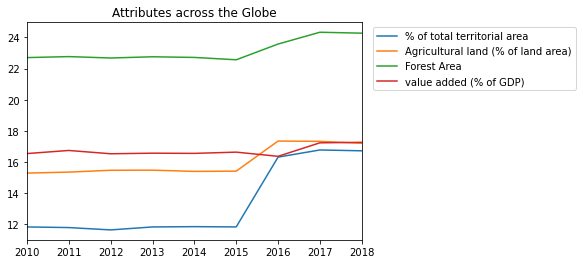

In [20]:
#Changing the index of ddd dataframe to get a Time Seies plot(DD/MM/YYYY) format
ddd.index = pd.to_datetime(ddd.index.astype(str).str[2:])
ddd.index = pd.to_datetime(ddd.index)
print(ddd)

#Plots the Dataframe
plt.figure(figsize=(15,8))
ddd.plot().legend(bbox_to_anchor= (1.02, 1));
plt.title('Attributes across the Globe')

##### Analysing and Plotting the Attributes for selected Countries(GBR,USA,IND,JPN) in Different regions of world 

year
YR2010    0.767744
YR2011    0.767744
YR2012    0.767744
YR2013    0.767744
YR2014    0.767744
YR2015    0.767744
YR2016    0.767744
YR2017    1.000000
YR2018    1.000000
Name: GBR, dtype: float64

GBR
average:         25.214169984890034
std. deviations: 0.42158781180629884
maximum :        25.8975736783367
minimum :        24.6765593353449
skewness:        0.49043496408071363
kurtosis:        -1.3391297277572924


""


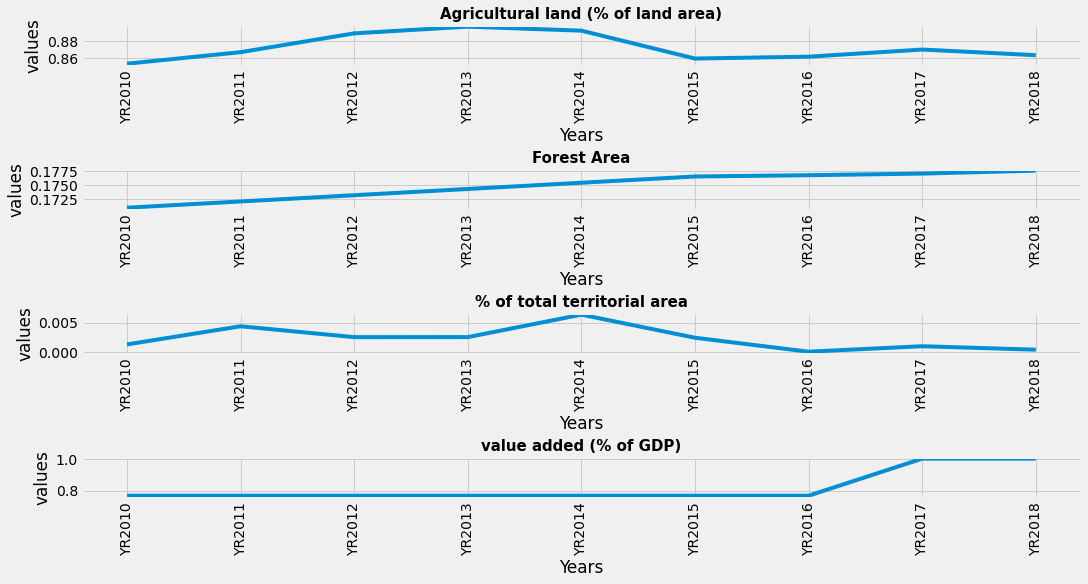

In [21]:
#Defing the datas for the individual plots of Country BRITAN
data=df_1.loc[idx['Agricultural land (% of land area)','GBR']]
data1=df_1.loc[idx['Forest Area','GBR']]*.4
data2=df_1.loc[idx['% of total territorial area','GBR']]
data3=df_1.loc[idx['value added (% of GDP)','GBR']]
print(data3)

#Function Call for Subplotting
subplot(data,data1,data2,data3)

#Display its Statistics as well
print()
print("GBR")
pd.DataFrame(Display_stats(df1.loc[idx['Agricultural land (% of land area)', 'GBR']]))


USA
average:         17.127457189507467
std. deviations: 0.10354757824783248
maximum :        17.2438567377468
minimum :        16.9454884546681
skewness:        -0.3315980530023953
kurtosis:        -1.1788834401867494


""


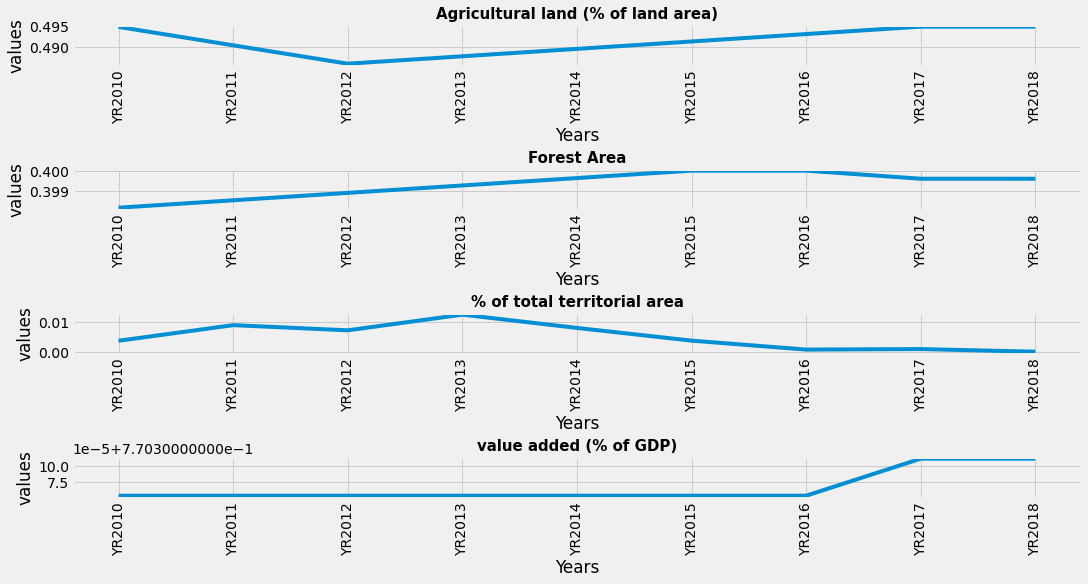

In [22]:
#Defing the datas for the individual plots of Country USA
idx=pd.IndexSlice
data=df_1.loc[idx['Agricultural land (% of land area)','USA']]
data1=df_1.loc[idx['Forest Area','USA']]*.4
data2=df_1.loc[idx['% of total territorial area','USA']]
data3=df_1.loc[idx['value added (% of GDP)','USA']]

#Function Call for Subplotting
subplot(data,data1,data2,data3)

#Display its Statistics as well
print()
print("USA")
pd.DataFrame(Display_stats(df1.loc[idx['Agricultural land (% of land area)', 'USA']]))


IND
average:         52.65960130365029
std. deviations: 0.07793218418608892
maximum :        52.8082631786061
minimum :        52.6088141020251
skewness:        1.2453282815166233
kurtosis:        -0.3239748378726284


""


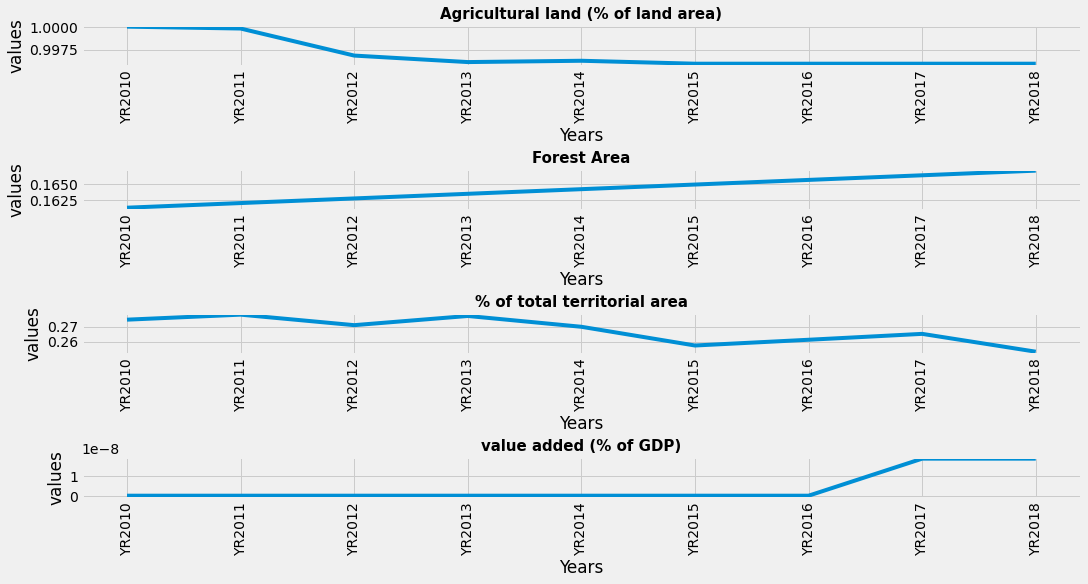

In [23]:
idx=pd.IndexSlice
#Defing the datas for the individual plots of Country INDIA
data=df_1.loc[idx['Agricultural land (% of land area)','IND']]
data1=df_1.loc[idx['Forest Area','IND']]*.4
data2=df_1.loc[idx['% of total territorial area','IND']]
data3=df_1.loc[idx['value added (% of GDP)','IND']]

#Function Call for Subplotting
subplot(data,data1,data2,data3)

#Display its Statistics as well
print()
print("IND")
pd.DataFrame(Display_stats(df1.loc[idx['Agricultural land (% of land area)', 'IND']]))


JPN
average:         11.563481176649912
std. deviations: 0.11872554164437299
maximum :        11.7475994513032
minimum :        11.363511659808
skewness:        -0.2320674241933395
kurtosis:        -1.0539150901557124


""


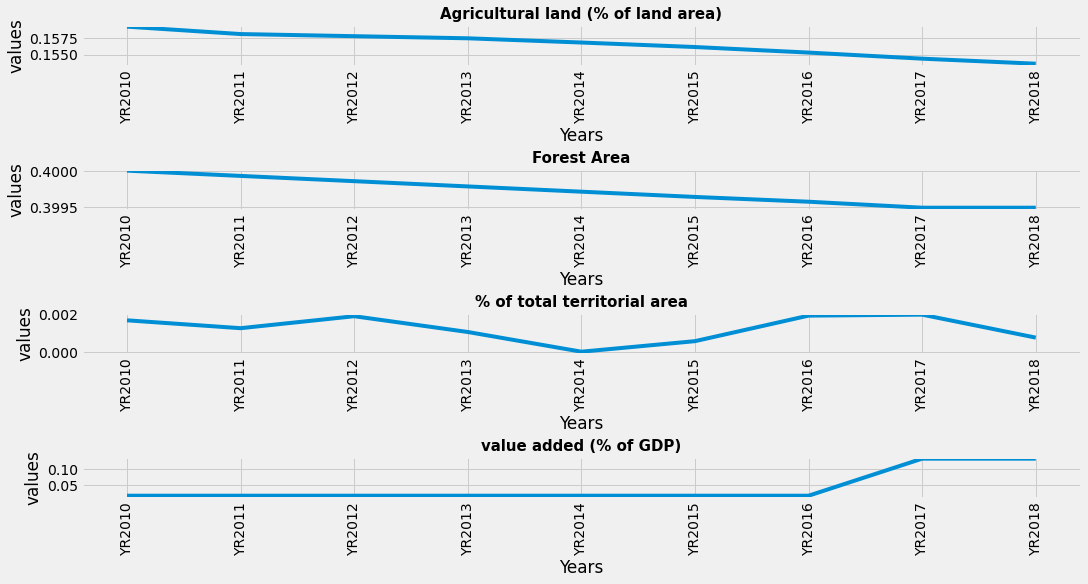

In [24]:
#Defing the datas for the individual plots of Country JAPAN
idx=pd.IndexSlice
data=df_1.loc[idx['Agricultural land (% of land area)','JPN']]
data1=df_1.loc[idx['Forest Area','JPN']]*.4
data2=df_1.loc[idx['% of total territorial area','JPN']]
data3=df_1.loc[idx['value added (% of GDP)','JPN']]

#Function Call for Subplotting
subplot(data,data1,data2,data3)

#Display its Statistics as well
print()
print("JPN")
pd.DataFrame(Display_stats(df1.loc[idx['Agricultural land (% of land area)', 'JPN']]))

             USA       GBR       KOR       JPN
year                                          
YR2010  0.770354  0.767744  0.033439  0.016226
YR2011  0.770354  0.767744  0.033439  0.016226
YR2012  0.770354  0.767744  0.033439  0.016226
YR2013  0.770354  0.767744  0.033439  0.016226
YR2014  0.770354  0.767744  0.033439  0.016226
YR2015  0.770354  0.767744  0.033439  0.016226
YR2016  0.770354  0.767744  0.033439  0.016226
YR2017  0.770411  1.000000  0.035080  0.133779
YR2018  0.770411  1.000000  0.035080  0.133779
                 USA       GBR       KOR       JPN
2010-01-01  0.770354  0.767744  0.033439  0.016226
2011-01-01  0.770354  0.767744  0.033439  0.016226
2012-01-01  0.770354  0.767744  0.033439  0.016226
2013-01-01  0.770354  0.767744  0.033439  0.016226
2014-01-01  0.770354  0.767744  0.033439  0.016226
2015-01-01  0.770354  0.767744  0.033439  0.016226
2016-01-01  0.770354  0.767744  0.033439  0.016226
2017-01-01  0.770411  1.000000  0.035080  0.133779
2018-01-01  0.770411  1.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

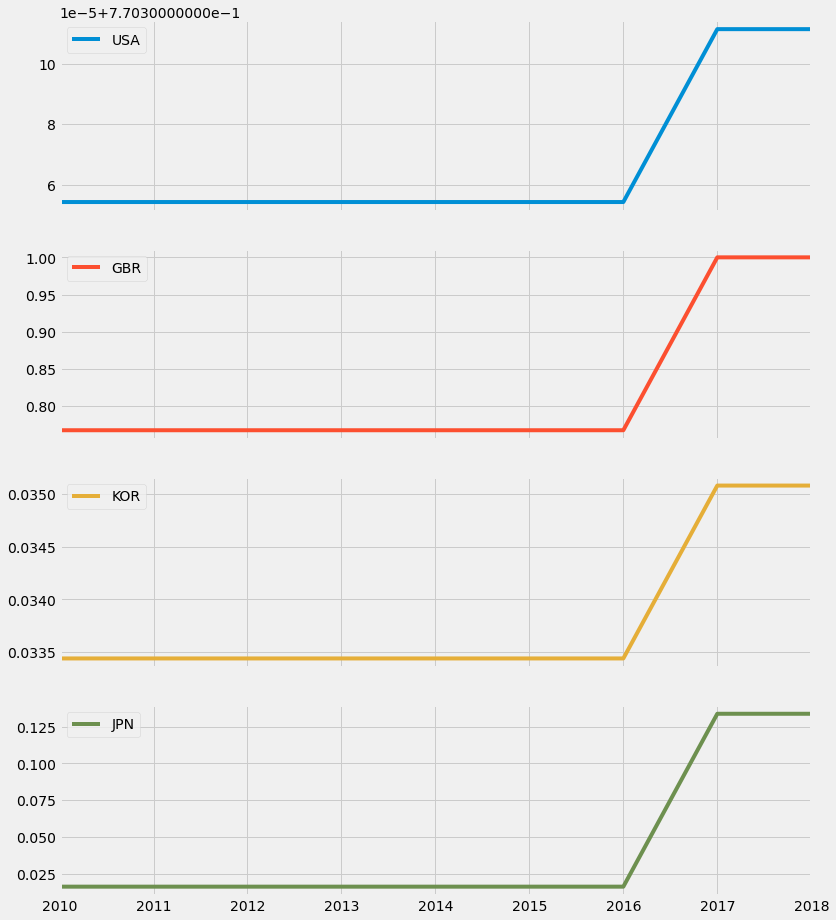

In [25]:
#Defining an dAnalysing the Variation in GDP for the above defined Countries

d1=df_1.loc[idx['value added (% of GDP)',['USA','GBR','KOR','JPN']]]
print(d1)


d1.index=['2010','2011','2012','2013','2014','2015','2016','2017','2018']
d1.index = pd.to_datetime(d1.index)
print(d1)

d1.plot(subplots=True, figsize=(12, 15))



##### Analysing and plotting variations in attribute Across different Regions of World(Europe,North America,South and East Asia)

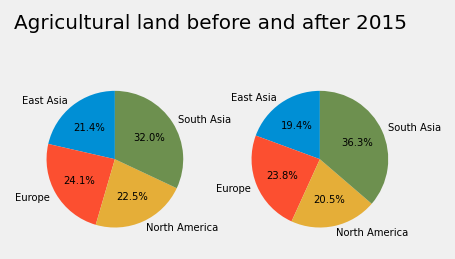

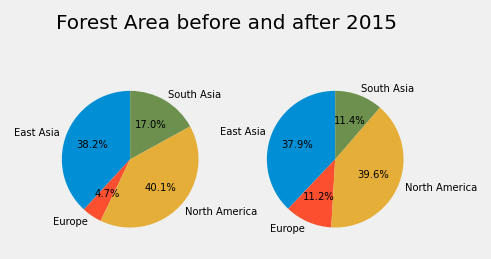

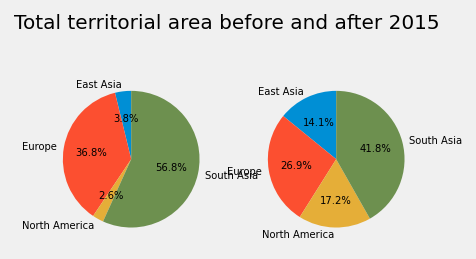

In [26]:
# Mapping the Existing Datframe with the Country_groups Dictionary to have a detailed Analysis.


df2['Region'] = df2.index.get_level_values(1).map(country_groups)
df2.groupby('Region')

# Defining the Slices For Plotting

agri=df2.loc[idx[['Agricultural land (% of land area)'],:]].groupby('Region').mean()
forest=df2.loc[idx[['Forest Area'],:]].groupby('Region').mean()
terrestial=df2.loc[idx[['% of total territorial area'],:]].groupby('Region').mean()

# Locating the Slices For Desired years
agri_a = agri.loc[:, "YR2015":"YR2018"].mean(axis=1)
agri_b= agri.loc[:, "YR2010":"YR2014"].mean(axis=1)

forest_a = forest.loc[:, "YR2015":"YR2018"].mean(axis=1)
forest_b= forest.loc[:, "YR2010":"YR2014"].mean(axis=1)


Terrestial_a = terrestial.loc[:, "YR2015":"YR2018"].mean(axis=1)
Terrestial_b= terrestial.loc[:, "YR2010":"YR2014"].mean(axis=1)

# Plotting with the Function Region_wise
Region_wise(agri_b,agri_a,'Agricultural land before and after 2015')
Region_wise(forest_b,forest_a,'Forest Area before and after 2015')
Region_wise(Terrestial_b,Terrestial_a,'Total territorial area before and after 2015')

In [27]:
# Printing the Correlation between Attributes 

print_corr(ddd)

Pearson's correlation coefficients

 Agricultural land (% of land area) vs. Forest Area coefficient  0.6166666666666666 probability 0.07692880993776309

 Forest Area vs. % of total territorial area coefficient 0.65 probability 0.05807305801714863

 % of total territorial area vs. value added (% of GDP) coefficient 0.38333333333333336 probability 0.30849527238037144

 Agricultural land (% of land area) vs. value added (% of GDP) coefficient 0.06666666666666667 probability 0.8646897846262037


<AxesSubplot:xlabel='Attributes', ylabel='Attributes'>

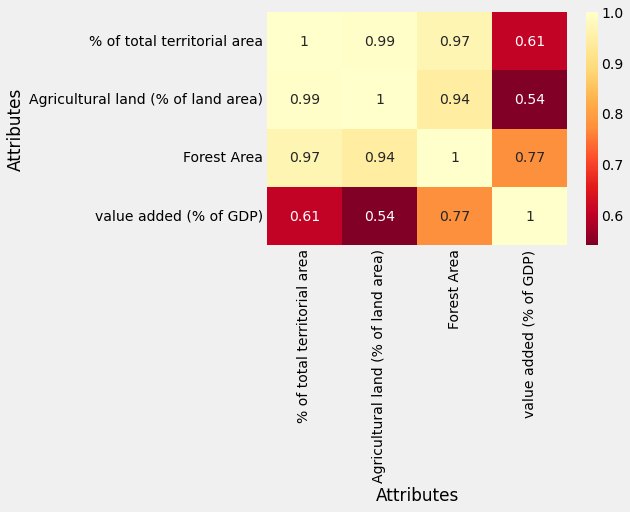

In [28]:
# plotting the Correlation using Heatmap

sns.heatmap(ddd.corr(), annot = True,cmap="YlOrRd_r")

### END